### CS4423 - Networks
Anton Baykalov  
School of Mathematical and Statistical Sciences  
University of Galway  

[![Open in Binder](images/badge_logo.png)](https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD)

https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD

#### 1. Graphs and Graph Theory

# Week 3, lecture 1: 

# Bipartite Graphs, Block Matrices and Projections. 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
opts = { "with_labels": True, "node_color":'y' }

## Walks, paths, cycles ....

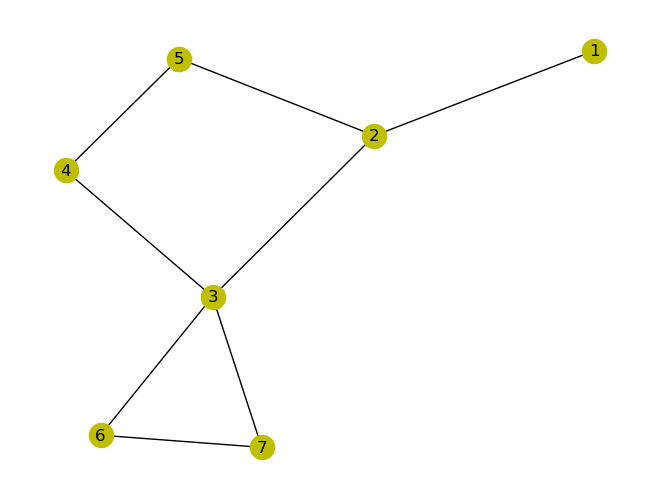

In [3]:
G = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5),
              (5, 2), (3, 6), (6, 7), (7, 3)])
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, **opts)

Below is just a little function which draws the graph $G$ with highlighted edges and nodes.

In [4]:
def draw_example(title, highlighted_edges, highlighted_nodes):
    plt.figure(figsize=(6, 5))
    
    # Draw base graph
    nx.draw(
        G, pos,
        with_labels=True,
        node_color="lightgray",
        edge_color="lightgray",
        node_size=800
    )
    
    # Highlight nodes
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=highlighted_nodes,
        node_color="orange",
        node_size=900
    )
    
    # Highlight edges
    nx.draw_networkx_edges(
        G, pos,
        edgelist=highlighted_edges,
        edge_color="red",
        width=3
    )
    
    plt.title(title)
    plt.axis("off")
    plt.show()

For the definitions below, let $G=(V,E)$ be the graph with the set of vertices $V$ and the set of edges $E$, and let $x,y \in V$.

**Definition.** A **walk** $W(x, y)$ from node $x$ to node $y$ is an alternating sequence of nodes and edges 
$$ W = (x=n_0 , e_1 , n_1 , e_2 , \ldots , e_l , n_l = y)$$ that begins with $x$ and ends with $y$, such that 
$$e_i = (n_{i−1} , n_i ) \text{ for } i = 1, 2, \ldots , l.$$ 

Usually a walk is indicated by giving only the sequence of traversed
nodes: $$ W = (x=n_0, n_1, \ldots, n_l = y).$$ 

The **length** of the walk, $l = \mathit{l}(W)$, is defined as
the number of edges in the sequence.

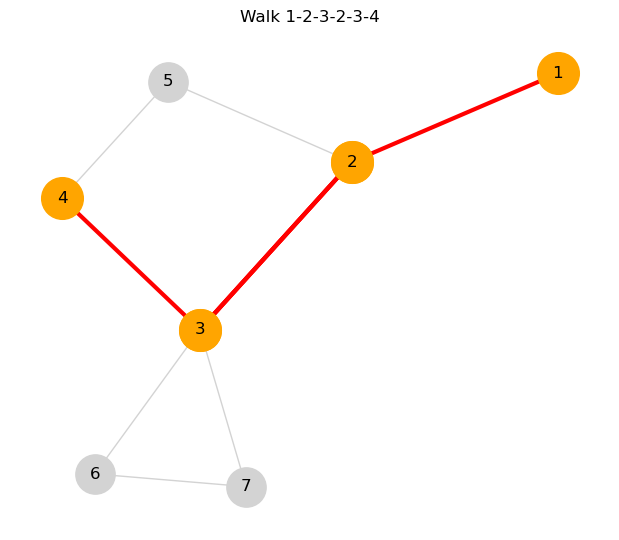

In [5]:
walk_edges = [(1, 2), (2, 3), (3, 2), (2, 3), (3, 4)]
walk_nodes = [1, 2, 3, 2, 3, 4]
draw_example("Walk 1-2-3-2-3-4", walk_edges, walk_nodes)

**Definition.** A **trial**  is a walk in which no edge is repeated.

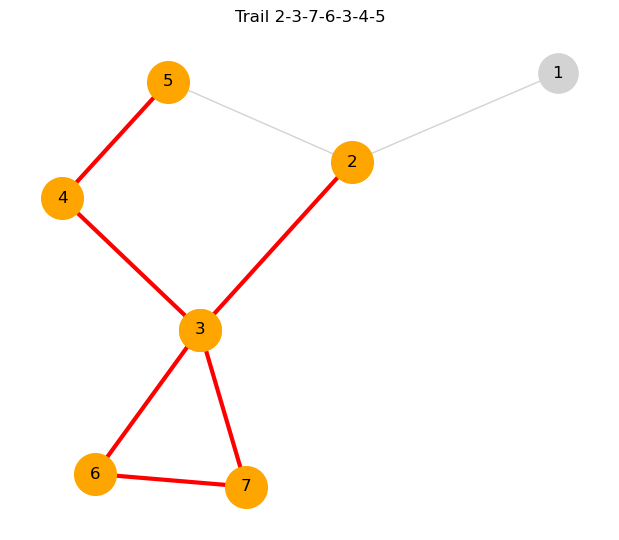

In [6]:
trail_edges = [(2, 3), (3, 7), (7,6), (6,3), (3,4), (4, 5)]
trail_nodes = [2, 3, 7, 6, 3, 4, 5]
draw_example("Trail 2-3-7-6-3-4-5", trail_edges, trail_nodes)

**Definition.** A **path**  is a walk in which no node is repeated (and therefore no edge is repeated either).

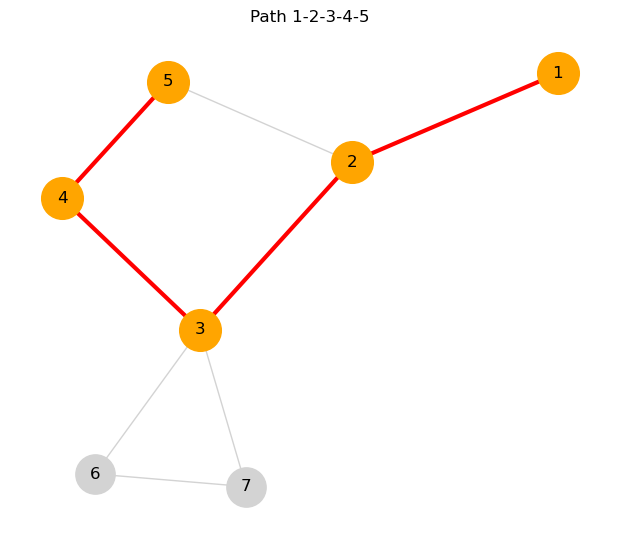

In [7]:
path_edges = [(1, 2), (2, 3), (3, 4), (4, 5)]
path_nodes = [1, 2, 3, 4, 5]
draw_example("Path 1-2-3-4-5", path_edges, path_nodes)

**Definition.** A **circuit** is a closed trail, i.e. a trail whose end vertices coincide (so $x=y$).

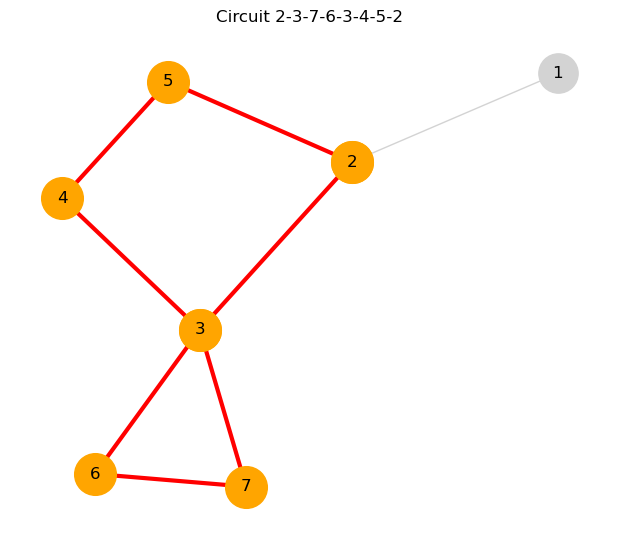

In [8]:
circuit_edges = [(2, 3), (3, 7), (7,6), (6,3), (3,4), (4, 5), (5,2)]
circuit_nodes = [2, 3, 7, 6, 3, 4, 5, 2]
draw_example("Circuit 2-3-7-6-3-4-5-2", circuit_edges, circuit_nodes)

**Definition.** A **cycle**  is a closed walk, of at least three edges $ W = (n_0, n_1, \ldots, n_l),$
$l \ge 3$, with $n_0 = n_l$ and $n_i$ , $0 < i < l$, distinct from each other and from $n_0$.

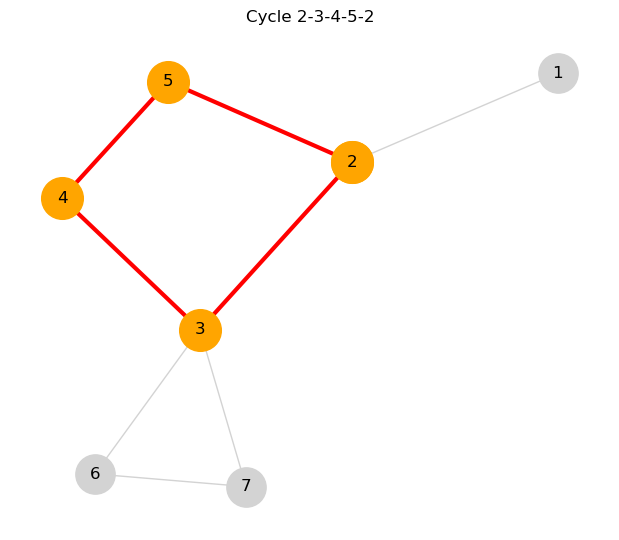

In [9]:
cycle_edges = [(2, 3), (3, 4), (4, 5), (5, 2)]
cycle_nodes = [2, 3, 4, 5, 2]
draw_example("Cycle 2-3-4-5-2", cycle_edges, cycle_nodes)

## Powers of Adjacency Matrix

Now, knowing this terminology, we can formulate what exactely the powers of the adjacency matrix represent!

* $A^k(i,j)$ is the number of walks of length $k$ from $i$-th vertix to $j$-th vertix.

In [10]:
A = nx.adjacency_matrix(G).toarray()
print(A,'\n')
print(A@A,'\n')
print(A@A@A, '\n')

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0]
 [0 1 0 1 0 1 1]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 0 0 1 0]] 

[[1 0 1 0 1 0 0]
 [0 3 0 2 0 1 1]
 [1 0 4 0 2 1 1]
 [0 2 0 2 0 1 1]
 [1 0 2 0 2 0 0]
 [0 1 1 1 0 2 1]
 [0 1 1 1 0 1 2]] 

[[0 3 0 2 0 1 1]
 [3 0 7 0 5 1 1]
 [0 7 2 6 0 5 5]
 [2 0 6 0 4 1 1]
 [0 5 0 4 0 2 2]
 [1 1 5 1 2 2 3]
 [1 1 5 1 2 3 2]] 



## Complement of a graph

**Definition.** The **complement** $\bar{G}$ of a graph $G = (V,E)$ is the graph with vertex set $V$ and edge set $\binom{X}{2} \backslash E$. 


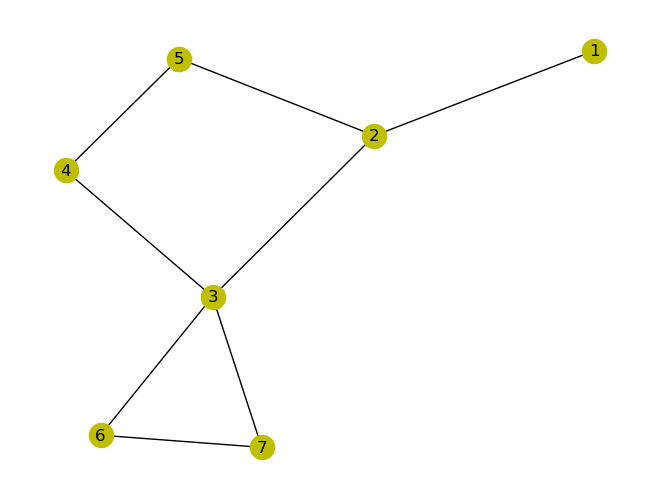

In [11]:
G_bar = nx.complement(G)
nx.draw(G, pos, **opts)

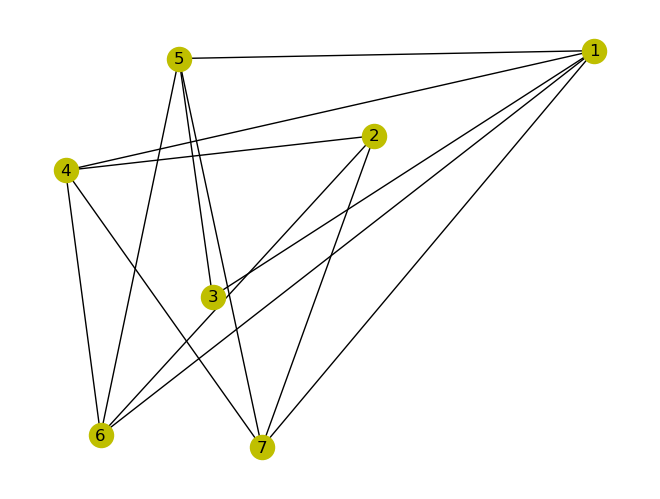

In [12]:
nx.draw(G_bar, pos, **opts)

## Bipartite Graphs and colorings

A **(vertex)-coloring** of a graph $G$ is an assignment of (finitely many) colors to the nodes of $G$,
so that any two nodes which are connected by an edge have *different* colors.

* A graph is called **$N$-colorable**, if it has a vertex coloring with (at most) $N$ colors.

* The **chromatic number of a graph $G$** is smallest $N$ for which a graph $G$ is $N$-colorable.

**Theorem.** Let $G$ be a graph.  The following are equivalent:

* $G$ is bipartite;

* $G$ is $2$-colorable;
 
* each cycle in $G$ has even length.


The method `nx.bipartite.color` determines a $2$-coloring of a graph $G$ algorithmically, if it exists, i.e. if
$G$ is bipartite. 

For instance, consider a 2-dimensional $4\times 4$ grid:

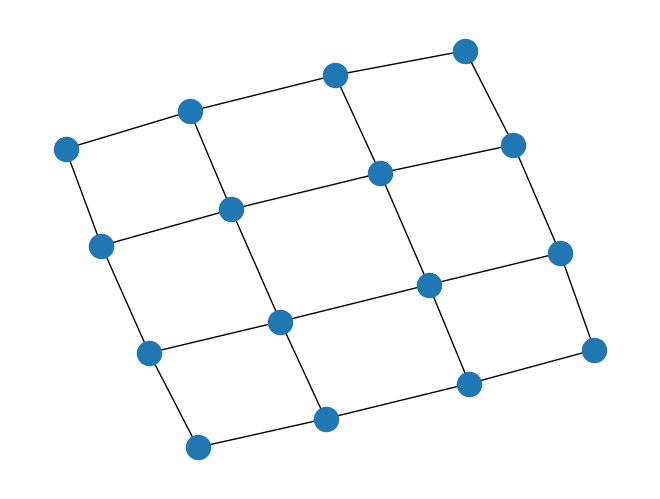

In [13]:
G44 = nx.grid_2d_graph(4, 4)
nx.draw(G44)

In [14]:
color = nx.bipartite.color(G44)
color

{(0, 0): 1,
 (1, 0): 0,
 (0, 1): 0,
 (1, 1): 1,
 (0, 2): 1,
 (1, 2): 0,
 (0, 3): 0,
 (1, 3): 1,
 (2, 3): 0,
 (3, 3): 1,
 (2, 2): 1,
 (3, 2): 0,
 (2, 1): 0,
 (3, 1): 1,
 (2, 0): 1,
 (3, 0): 0}

In [15]:
color = [color[x] for x in G44.nodes()]
color

[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]

In [16]:
opts2 = { "with_labels": True, "node_color":color, "font_color":'r' }

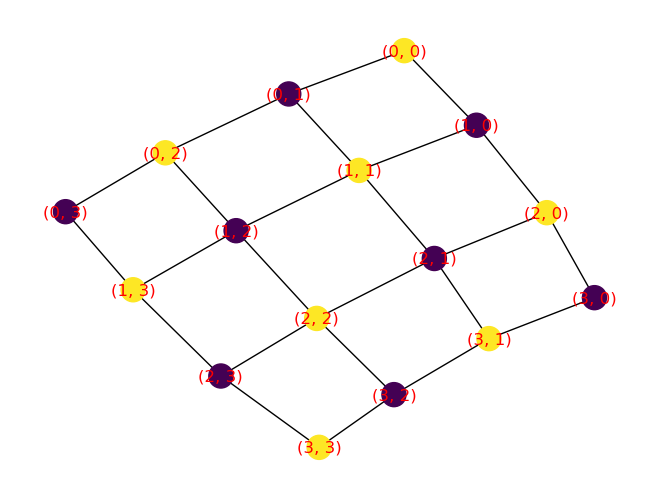

In [17]:
nx.draw(G44, **opts2)

**Note.** This won't work on a graph that is not $2$-colorable:

In [18]:
nx.bipartite.color(nx.complete_graph(3))

NetworkXError: Graph is not bipartite.

## Affiliation Networks and Projections

Bipartite graphs arise in practice as models for **affiliation networks**.
In such a network, on one side of the graph we find people or *actors*, and on the other side attributes 
of the people, such as common interests (books bought online, TV shows watched), workplaces, social events attended ...
Edges in such network connect people with their attributes.



We construct a bipartite graph on the vertex set consisting of some of the first respondents to the survey and the 10 TV shows by using the following adjacency list:

In [19]:
!cat data/tv_short.adj

Anton	FO Bob SP GT Si Ma TLoU 
Milo	FO BrB GT Si TLoU 
Mike	SP GT Si Ma 
Sade	Si Bob 
R	Bob SP BrB Si 
Alex	FO BrB Ma 
V	TLoU MH Ma GT BrB TW 
BradPitt	Si MH 
Kelly	Si 
Paul	BrB GT Si Ma 
CHIEFWIGAM	Si GT TLoU Ma MH BrB TW SP Bob FO 


In [20]:
G=nx.read_adjlist("data/tv_short.adj")

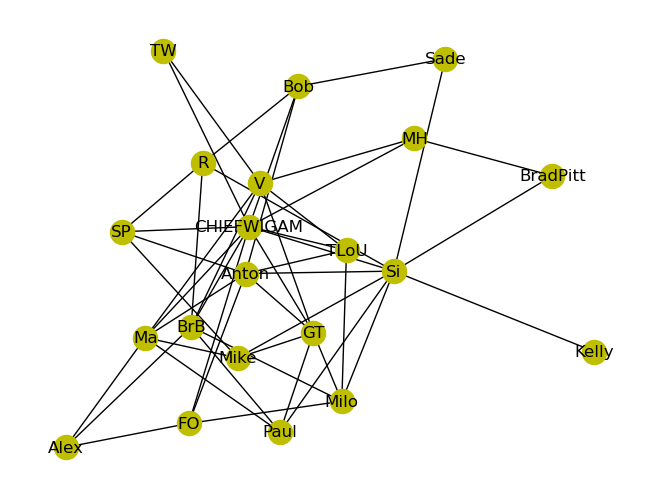

In [21]:
nx.draw(G, **opts)

In [22]:
opts2 = { "with_labels": True, "font_color":'r' }

In [23]:
color = nx.bipartite.color(G)
print(color)

{'Anton': 1, 'FO': 0, 'Bob': 0, 'SP': 0, 'GT': 0, 'Si': 0, 'Ma': 0, 'TLoU': 0, 'Milo': 1, 'V': 1, 'CHIEFWIGAM': 1, 'MH': 0, 'BrB': 0, 'TW': 0, 'R': 1, 'Alex': 1, 'Paul': 1, 'BradPitt': 1, 'Mike': 1, 'Sade': 1, 'Kelly': 1}


In [24]:
color = [color[i] for i in G.nodes()]
opts2["node_color"] = color

In [25]:
actors = ['Anton','Milo','Mike','Sade','R','Alex','V','BradPitt','Kelly','Paul','CHIEFWIGAM']
len(actors)

11

In [26]:
foci = ['FO','Bob','SP','GT','Si','Ma','TLoU','BrB', 'MH','TW']
len(foci)

10

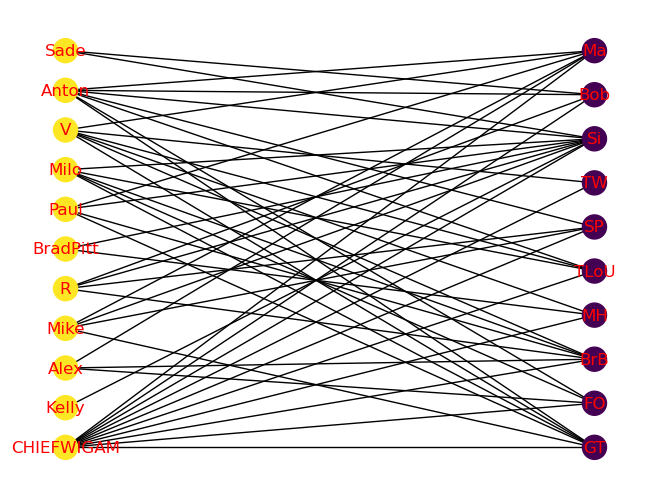

In [27]:
nx.draw(G,nx.bipartite_layout(G,actors,align='vertical'),**opts2)

**Note.** The adjacency matrix $A$ of a bipartite graph $G$, with respect to a suitable ordering of the vertices
($X_1$ first, then $X_2$), has the form of a $2 \times 2$-block matrix,
$$
  A = \left( \begin{array}{cc} 0 & C \\ C^T & 0 \end{array} \right)
$$
where the blocks on the diagonal consist entirely of zeros, as there are no edges between vertices of the same color, and the lower left block is the **transpose** $C^T$ of the matrix $C$ of entries in the upper right. 

In [28]:
M=nx.adjacency_matrix(G)
print(M.toarray())

[[0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0]]


To see the adjacency matrix in block form we need to give the nodes in a suitable order...

In [29]:
H=nx.Graph()
H.add_nodes_from(actors)
H.add_nodes_from(foci)
H.nodes()

NodeView(('Anton', 'Milo', 'Mike', 'Sade', 'R', 'Alex', 'V', 'BradPitt', 'Kelly', 'Paul', 'CHIEFWIGAM', 'FO', 'Bob', 'SP', 'GT', 'Si', 'Ma', 'TLoU', 'BrB', 'MH', 'TW'))

... and then import the edges from $G$.

In [30]:
H.add_edges_from(G.edges())
print(list(H.edges()))

[('Anton', 'FO'), ('Anton', 'Bob'), ('Anton', 'SP'), ('Anton', 'GT'), ('Anton', 'Si'), ('Anton', 'Ma'), ('Anton', 'TLoU'), ('Milo', 'FO'), ('Milo', 'GT'), ('Milo', 'Si'), ('Milo', 'TLoU'), ('Milo', 'BrB'), ('Mike', 'SP'), ('Mike', 'GT'), ('Mike', 'Si'), ('Mike', 'Ma'), ('Sade', 'Bob'), ('Sade', 'Si'), ('R', 'Bob'), ('R', 'SP'), ('R', 'Si'), ('R', 'BrB'), ('Alex', 'FO'), ('Alex', 'Ma'), ('Alex', 'BrB'), ('V', 'GT'), ('V', 'Ma'), ('V', 'TLoU'), ('V', 'BrB'), ('V', 'MH'), ('V', 'TW'), ('BradPitt', 'Si'), ('BradPitt', 'MH'), ('Kelly', 'Si'), ('Paul', 'GT'), ('Paul', 'Si'), ('Paul', 'Ma'), ('Paul', 'BrB'), ('CHIEFWIGAM', 'FO'), ('CHIEFWIGAM', 'Bob'), ('CHIEFWIGAM', 'SP'), ('CHIEFWIGAM', 'GT'), ('CHIEFWIGAM', 'Si'), ('CHIEFWIGAM', 'Ma'), ('CHIEFWIGAM', 'TLoU'), ('CHIEFWIGAM', 'BrB'), ('CHIEFWIGAM', 'MH'), ('CHIEFWIGAM', 'TW')]


In [31]:
AA=nx.adjacency_matrix(H)

In [32]:
with np.printoptions(threshold=9999):
    print(AA.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


* In `NetworkX`, all parts of a graph can have **attributes**: the nodes, 
the edges, and the graph object itself.  Graph object attributes of a graph `G` are stored in the field `G.graph`.  By convention, the two
underlying sets of a bipartite graph are offten called `'top'` and `'bottom'`.

In [33]:
from networkx.algorithms import bipartite
#F = bipartite.random_graph(5, 7, 0.2)
F = nx.complete_bipartite_graph(3,4)
print(list(F.nodes(data = True)),'\n')
print(F.graph)

[(0, {'bipartite': 0}), (1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 1}), (4, {'bipartite': 1}), (5, {'bipartite': 1}), (6, {'bipartite': 1})] 

{'name': 'complete_bipartite_graph(3, 4)'}


* Here, we will simply construct lists of vertices from each of the two sets $X$ and $Y$ and construct a *biadjacency matrix* (this is all it's needed to (re)construct a bipartite graph!).

In [34]:
X, Y = actors, foci
C = nx.bipartite.biadjacency_matrix(H, X, Y)
print(C.toarray())

[[1 1 1 1 1 1 1 0 0 0]
 [1 0 0 1 1 0 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 0 0]
 [1 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 0 1 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


As $A = A^T$, we get
\\[
A^T \cdot A = A \cdot A^T = A \cdot A = 
\left(
\begin{array}{cc}
C \cdot C^T & 0 \\ 0 & C^T \cdot C
\end{array}
\right)
\\]
where 
* $C \cdot C^T$ is (almost!) the adjacency matrix of the **projection** onto the vertex set $X$,
and 

* $C^T \cdot C$is (almost!) the adjacency matrix of the **projection** onto the vertex set $Y$.

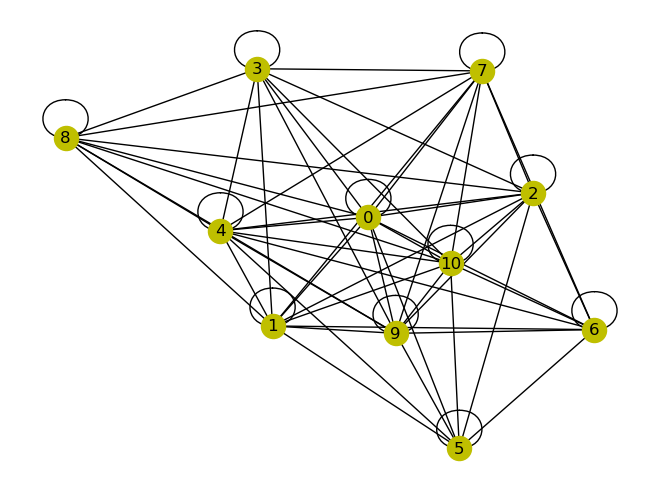

In [35]:
BB = nx.from_numpy_array((C@C.transpose()).toarray())
nx.draw(BB, **opts)

The loops are an indication that we've constructed a graph from a matrix that is not exactly an adjacency matrix:

In [36]:
print(C@C.transpose().toarray())

[[ 7  4  4  2  3  2  3  1  1  3  7]
 [ 4  5  2  1  2  2  3  1  1  3  5]
 [ 4  2  4  1  2  1  2  1  1  3  4]
 [ 2  1  1  2  2  0  0  1  1  1  2]
 [ 3  2  2  2  4  1  1  1  1  2  4]
 [ 2  2  1  0  1  3  2  0  0  2  3]
 [ 3  3  2  0  1  2  6  1  0  3  6]
 [ 1  1  1  1  1  0  1  2  1  1  2]
 [ 1  1  1  1  1  0  0  1  1  1  1]
 [ 3  3  3  1  2  2  3  1  1  4  4]
 [ 7  5  4  2  4  3  6  2  1  4 10]]


We could use the usual method (fill the diagonal with $0$s and replace any positive number with a $1$) to get an actual adjacency matrix, or...

The `networkx` function `projected_graph` (taking input a bipartite graph and one of the two sets of vertices) does this for us:

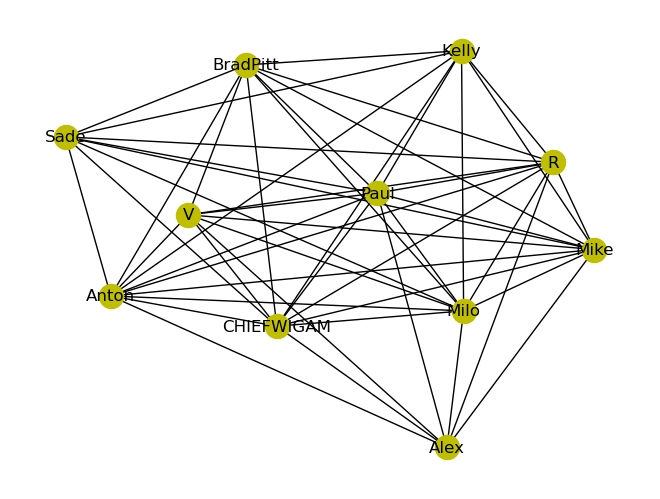

In [37]:
XX = nx.projected_graph(H, X)
nx.draw(XX, **opts)

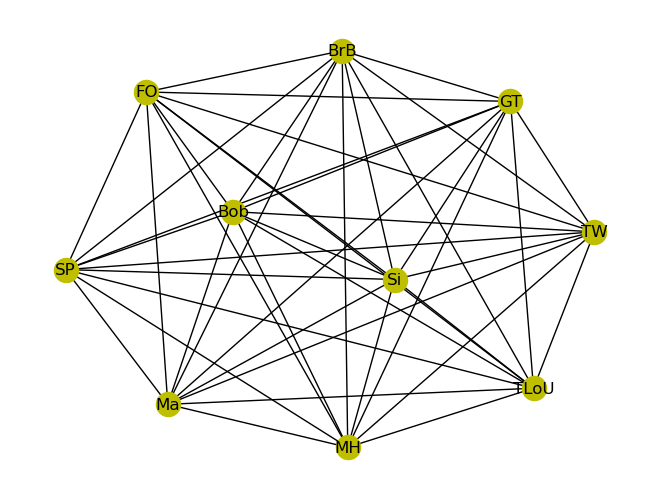

In [38]:
YY = nx.projected_graph(H,Y)
nx.draw(YY, **opts)

Adjacency in the above graphs could be considered an indication of compatibility (between people, because they have watched shows in common; between shows, because adjacent ones might be appealing for like-minded people). Similar data structures are used to inform the typical "You might also like" boxes that we find in apps of streaming services or online shopping websites.

##  Code Corner

### Dictionaries 
A dictionary is a fast, flexible way to store and access data using named keys instead of positions.
A dictionary stores data as key–value pairs. Think of it like a real dictionary:

* You look up a word (the key)

* You get its definition (the value)


You create a dictionary using curly braces `{}`.

In [39]:
person = {
    "name": "Sara",
    "age": 25,
    "city": "Paris"
}

print(person["name"])


Sara


A key does not need to be a string. Adding, chenging, removing values:

In [40]:
person[1] = 7/5 #new key-value
person["age"] = 26 #changing existing value
del person["city"] # removing key-value
print(person)

{'name': 'Sara', 'age': 26, 1: 1.4}


Looping through a dictionary:

In [41]:
for key in person:
    print(key)

name
age
1


In [42]:
for value in person.values():
    print(value)

Sara
26
1.4


In [43]:
for key, value in person.items():
    print(key, ":", value)

name : Sara
age : 26
1 : 1.4


### `numpy`

* `array`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.array.html)

* `transpose`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)

* `printoptions`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.printoptions.html) set options for printing arrays

### `networkx`

* `bipartite.color`: [[doc]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.basic.color.html) computes a $2$-coloring of a graph

* `bipartite_layout`: [doc](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.bipartite_layout.html) works out a useful way to draw a bipartite graph

* `bipartite.biadjacency_matrix`: [[doc]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.matrix.biadjacency_matrix.html) the incidence matrix of a bipartite graph

* `projected_graph`: [[doc]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.projection.projected_graph.html) the projected graph

